In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits
from astropy.wcs import WCS
import sys
sys.path.append('../')
from setup import *
%matplotlib widget

In [2]:
fitfile1 = fitfilebase.format(1) + '_aic.fits'
fitfile2 = fitfilebase.format(2) + '_aic.fits'
ncomponentsfile = fitdir + 'diagnosticAIC/ncomponents_AIC.fits'
parameter = 1 #0:amp, 1:vel, 2:sigma

In [3]:
params1 = fits.getdata(fitfile1)
params2 = fits.getdata(fitfile2)
ncomp, header = fits.getdata(ncomponentsfile, header=True)
wcs = WCS(header)

In [4]:
paramsplot = np.ones(np.shape(params1[1]))*np.nan
index1 = np.where(~np.isnan(params1[1]))
index2 = np.where(~np.isnan(params2[4]))
for y, x in zip(index1[0], index1[1]):
    paramsplot[y, x] = params1[parameter, y, x]
for y, x in zip(index2[0], index2[1]):
    paramsplot[y, x] = params2[parameter+3, y, x]

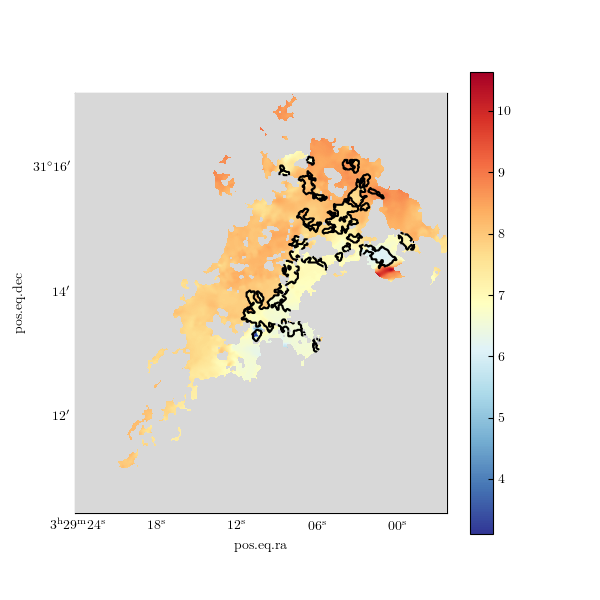

In [5]:
cmap = cm.RdYlBu_r.copy()
cmap.set_bad('0.85')


fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection = wcs)
im = ax.imshow(paramsplot, cmap=cmap, zorder=10)
ax.contour(ncomp, levels=[1.5], colors='k', zorder=20)
plt.colorbar(im, ax=ax)
# ax.imshow(params2[1], cmap=cmap2, zorder=10)
# ax.imshow(np.ones(np.shape(params1[1]))*np.nan, cmap=cmap3, zorder=0)